In [1]:
# We import all libraries that we use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [4]:
#route = 'C:/Users/Documents/Database/'  # This is an example of Database´s route, can be local or online. You can put here your local direction
#https://nimbus.cicese.mx/public.php?service=files&t=454bf55581f6dc4a3b893b9967805f96           # or a web direction

# We salve the database in df´s variable and use the method of Pandas read_CSV to reading CSV files
df = pd.read_csv(route + 'database.csv') # Put here your local direction where you have the database 
print("The size of the database is:", df.shape)

The size of the database is: (165, 14)


In [5]:
# Pandas assign automatically a type of data but we need to check that the type of data be numeric
# because the mathematic functions of Machine Learning (ML) don´t permit text-type of data
# and as we can see, all type of data are float.

print("Show the type of the data\n", df.dtypes) 

Show the type of the data
 Latency (ms)                        float64
 Jitter (ms)                        float64
 Bit Rate (Mbps)                    float64
 Packet Loss Rate (%)               float64
 Peak Data Rate DL (Gbps)           float64
 Peak Data Rate UL (Gbps)           float64
 Mobility (km/h)                    float64
 Reliability (%)                    float64
 Service Availability (%)           float64
 Survival Time (ms)                 float64
 Experienced Data Rate DL (Mbps)    float64
 Experienced Data Rate UL (Mbps)    float64
 Interruption Time (ms)             float64
 Service                             object
dtype: object


In [9]:
# This shows the first five rows contained in the dataset
df.head(10)

,Latency (ms),Jitter (ms),Bit Rate (Mbps),Packet Loss Rate (%),Peak Data Rate DL (Gbps),Peak Data Rate UL (Gbps),Mobility (km/h),Reliability (%),Service Availability (%),Survival Time (ms),Experienced Data Rate DL (Mbps),Experienced Data Rate UL (Mbps),Interruption Time (ms),Service
0,15.0,5.00,11.0,1.000000e-01,18.0,7.000,260.0,95.00000,99.0000,8.0,1000.0,500.0,1000.0,UHD_Video_Streaming
1,5.0,5.50,10.0,1.000000e+00,20.0,10.000,20.0,95.00000,99.2000,9.0,990.0,440.0,2000.0,UHD_Video_Streaming
2,8.0,10.00,50.0,3.800000e+00,15.0,7.000,15.0,97.00000,99.9000,10.0,1000.0,50.0,0.2,Immerse_Experience
3,40.0,1.00,0.5,1.000000e-05,18.0,9.000,0.0,99.92000,99.9990,10.0,5.0,8.0,0.0,Smart_Grid
4,90.0,18.00,0.2,8.000000e-02,13.0,2.000,480.0,99.99950,99.9999,100.0,10.0,10.0,1000.0,ITS
5,130.0,5.00,8.0,9.000000e-01,14.0,6.000,400.0,99.94000,95.0000,100.0,50.0,25.0,0.0,Vo5G
6,10.0,19.00,32.0,4.700000e+00,13.0,5.000,26.0,95.60000,99.9200,8.9,900.0,40.0,0.1,Immerse_Experience
7,2.0,3.00,15.0,8.000000e-09,0.2,0.200,100.0,99.99996,99.0000,1.0,10.0,100.0,0.0,e_Health
8,5.0,0.50,10.0,7.500000e-04,0.8,0.024,80.0,99.99920,99.0000,1.0,50.0,25.0,0.0,Connected_Vehicles
9,1.0,0.05,0.6,1.000000e-07,15.0,6.000,28.0,99.99900,99.9999,0.0,1.0,10.0,100.0,Industry_Automation


In [8]:
# Now, we are going to see some characteristics of the dataset
#df.describe(include='all')
df.describe()

TypeError: describe() got an unexpected keyword argument 'columns'

In [4]:
# ------------------------------------------  1st SIMULATION  ---------------------------------------------------

# Data Labeling block

X = df.iloc[:,:8].values  # Independent Variable corresponds to the KPI parameters
Y = df.iloc[:,-1].values  # Dependent Variable corresponds to 5G services’ labels

print("The size of the independent variable is:",X.shape)
print("The size of the dependent variable is:",Y.shape)

The size of the independent variable is: (165, 8)
The size of the dependent variable is: (165,)


In [5]:
# Data split block
# The data is divided such that 80% to train the ML algorithm
# and the remaining 20% to test using the train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print("The size of the test data is:", X_test.shape)
print("The size of the train data is:", X_train.shape)

The size of the test data is: (33, 8)
The size of the train data is: (132, 8)


In [6]:
# In this cell, we are going to create several Supervised Machine Learning (SML) algorithms 
# to check which one works best as a classifier in this simulation. For example:

# With the function DecisionTreeClassifier we create a Decision Tree algorithm
# With the function RandomForestClassifier we create a Random Forest algorithm
# With the function SVC and kernel=linear we create a Linear Support Vector Classification algorithm
# With the function KNeighborsClassifier we create a Classifier implementing the k-nearest neighbors vote
# With the function MLPClassifier we create a Multi-layer Perceptron classifier
# With the function GaussianNB we create a Gaussian Naive Bayes classifier


classifiers = [DecisionTreeClassifier(criterion = 'entropy', random_state = 0),                     
         RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0),    
         SVC(kernel = "linear", C = 0.025),                                                                                                                             
         KNeighborsClassifier(3),                                                              
         MLPClassifier(alpha = 1, max_iter = 1000)]   

# We create a tuple which contain the names of the classifiers.
names = ["Decision Tree", "Random Forest", "Linear SVM", "K-Nearest Neighbors", "Neural Net"]

In [7]:
# For the validation of the algorithm we use cross-validation technique with 10 division and accuracy it´s checked
kf = KFold(n_splits = 10)
cross_val_scores = [] # We create an empty tuple that will contain the cross-validation values means of each model

for name, model in zip(names, classifiers):
    model.fit(X_train, y_train)            # We fit each model
    score = model.score(X_train, y_train)  # It is checked if the model learned well, testing its accuracy on the same training data
    print("The", name,"model metric accuracy is:", score*100, "%")
    cros_val_scores = cross_val_score(model, X_train, y_train, cv = kf, scoring = "accuracy") # We use K-Fold cross-validation
    print("Metrics of cross-validation of the", name, cros_val_scores)
    print("The Cross-validation mean of the", name,"is:", cros_val_scores.mean()*100, "%")
    cross_val_scores.append(cros_val_scores.mean())    # Values of cross-validation stage are going to be inserted in the tuple
    print("------------------------------------------------------------------------------------------------") 

The Decision Tree model metric accuracy is: 100.0 %
Metrics of cross-validation of the Decision Tree [1.         1.         1.         1.         1.         1.
 1.         0.92307692 1.         1.        ]
The Cross-validation mean of the Decision Tree is: 99.23076923076923 %
------------------------------------------------------------------------------------------------
The Random Forest model metric accuracy is: 100.0 %
Metrics of cross-validation of the Random Forest [1.         1.         1.         1.         1.         1.
 1.         0.92307692 1.         1.        ]
The Cross-validation mean of the Random Forest is: 99.23076923076923 %
------------------------------------------------------------------------------------------------
The Linear SVM model metric accuracy is: 94.6969696969697 %
Metrics of cross-validation of the Linear SVM [0.92857143 0.92857143 0.84615385 0.92307692 1.         1.
 0.92307692 0.84615385 0.84615385 1.        ]
The Cross-validation mean of the Linear S

In [8]:
# Model Testing block.

y_predic_models = []   # We create an empty tuple that will contain the values of the predictions made by each model.
accuracy_models = []   # We create an empty tuple that will contain the values of the accuracy made by each model.
mcc_models = []        # We create an empty tuple that will contain the values of the Matthews coefcient of each model.

for name, model in zip(names, classifiers):
    y_predic = model.predict(X_test)              # We predict the test data (Xtest)
    y_predic_models.append(model.predict(X_test))  # The predictions are going to be inserted in the tuple 
    matrix = confusion_matrix(y_test, y_predic)  # Confusion Matrix of each model
    print("This is the confusion matrix result of the 1st Simulation with a", name,"\n", matrix, "\n")
    # Accuracy and Matthews coeficient of each model
    accuracy = accuracy_score(y_test, y_predic)   # Model accuracy of each model 
    accuracy_models.append(accuracy)   # The values of accuracy are going to be inserted in tuple
    print("The", name, "model has an accuracy of:", accuracy*100, "%")
    mcc = matthews_corrcoef(y_test, y_predic)      # Matthews coeficient
    mcc_models.append(mcc)               # The values of Matthews coeficient are going to be inserted in tuple
    print("The", name, "model has a Matthews coeficient of:", mcc*100, "%")
    print("--------------------------------------------------------------------------\n")

This is the confusion matrix result of the 1st Simulation with a Decision Tree 
 [[3 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0]
 [0 0 6 0 0 0 1 0 0]
 [0 0 0 5 0 0 0 0 0]
 [1 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 1]] 

The Decision Tree model has an accuracy of: 93.93939393939394 %
The Decision Tree model has a Matthews coeficient of: 93.1991983989024 %
--------------------------------------------------------------------------

This is the confusion matrix result of the 1st Simulation with a Random Forest 
 [[3 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0]
 [0 0 6 0 0 0 1 0 0]
 [0 0 0 5 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 1 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 1]] 

The Random Forest model has an accuracy of: 93.93939393939394 %
The Random Forest model has a Matthews coeficient of: 93.17697228144989 %
--------------------------------------------------------------------------

This is the confusion matri

In [73]:
# All the metrics and their values

for name, y_predic in zip(names, y_predic_models):
    print("The metrics of the", name, "model is:\n")
    print(metrics.classification_report(y_test, y_predic, digits = 3))

The metrics of the Decision Tree model is:

                      precision    recall  f1-score   support

  Connected_Vehicles      0.750     1.000     0.857         3
                 ITS      1.000     1.000     1.000         6
  Immerse_Experience      1.000     0.857     0.923         7
 Industry_Automation      1.000     1.000     1.000         5
          Smart_Grid      1.000     0.667     0.800         3
        Surveillance      1.000     1.000     1.000         3
 UHD_Video_Streaming      0.667     1.000     0.800         2
                Vo5G      1.000     1.000     1.000         3
            e_Health      1.000     1.000     1.000         1

            accuracy                          0.939        33
           macro avg      0.935     0.947     0.931        33
        weighted avg      0.957     0.939     0.940        33

The metrics of the Random Forest model is:

                      precision    recall  f1-score   support

  Connected_Vehicles      1.000     1.00

C:\Users\David\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
# ------------------------------------------  2nd SIMULATION  ------------------------------------
# ------------------------------------------------------------------------------------------------
#               Remember that the process is almost the same, with a few diferences

In [9]:
# The first we need to change is the size of independent and dependent variables because we include KQI parameters

# Data Labeling block
X2 = df.iloc[:,:-1].values # Independent Variable corresponds to the KPI parameters
Y2 = df.iloc[:,-1].values # Dependent Variable corresponds to the 5G services

print("The size of the independent variable is:",X2.shape)
print("The size of the dependent variable is:",Y2.shape)

The size of the independent variable is: (165, 13)
The size of the dependent variable is: (165,)


In [10]:
# Data split block, The data is divided equal to the first simulation

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size = 0.2,random_state = 42)
print("The size of the test data is:", X_test2.shape)
print("The size of the train data is:", X_train2.shape)

The size of the test data is: (33, 13)
The size of the train data is: (132, 13)


In [11]:
# Algorithm training block
# We fit the same algorithms so we don't have to create another, just trainning it
cross_val_scores2 = [] # We create another empty tuple for save the values of cross-validation stage in this simulation

for name, model in zip(names, classifiers):
    model.fit(X_train2, y_train2)            # We fit each model
    score = model.score(X_train2, y_train2)  # It is checked if the model learned well, testing its accuracy on the same training data
    print("The", name,"model metric accuracy is:", score*100, "%")
    cros_val_scores = cross_val_score(model, X_train2, y_train2, cv = kf, scoring = "accuracy") # We use K-Fold cross-validation
    print("Metrics of cross-validation of the", name, cros_val_scores)
    print("The Cross-validation mean of the", name,"is:", cros_val_scores.mean()*100, "%")
    cross_val_scores2.append(cros_val_scores.mean())    # Values of cross-validation stage are going to be inserted in the tuple
    print("--------------------------------------------------------------------------------------------") 

The Decision Tree model metric accuracy is: 100.0 %
Metrics of cross-validation of the Decision Tree [1.         1.         1.         1.         1.         0.84615385
 1.         0.92307692 1.         1.        ]
The Cross-validation mean of the Decision Tree is: 97.69230769230771 %
--------------------------------------------------------------------------------------------
The Random Forest model metric accuracy is: 100.0 %
Metrics of cross-validation of the Random Forest [0.92857143 1.         1.         1.         0.92307692 1.
 1.         1.         1.         1.        ]
The Cross-validation mean of the Random Forest is: 98.51648351648352 %
--------------------------------------------------------------------------------------------
The Linear SVM model metric accuracy is: 99.24242424242425 %
Metrics of cross-validation of the Linear SVM [0.92857143 1.         0.92307692 0.92307692 1.         0.84615385
 0.76923077 0.84615385 0.92307692 1.        ]
The Cross-validation mean of the

In [12]:
# Model Testing block.

y_predic_models2 = []   # We create another empty tuple that will contain the values of the predictions made by each model.
accuracy_models2 = []   # We create another empty tuple that will contain the values of the accuracy made by each model.
mcc_models2 = []        # We create another empty tuple that will contain the values of the Matthews coefcient of each model.

for name, model in zip(names, classifiers):
    y_predic2 = model.predict(X_test2)              # We predict the test data (Xtest)
    y_predic_models2.append(model.predict(X_test2))  # The predictions are going to be inserted in the tuple 
    matrix = confusion_matrix(y_test2, y_predic2)  # Confusion Matrix of each model
    print("This is the confusion matrix result of the 1st Simulation with a", name,"\n", matrix, "\n")
    # Accuracy and Matthews coeficient of each model
    accuracy = accuracy_score(y_test2, y_predic2)   # Model accuracy of each model 
    accuracy_models2.append(accuracy)   # The values of accuracy are going to be inserted in tuple
    print("The", name, "model has an accuracy of:", accuracy*100, "%")
    mcc = matthews_corrcoef(y_test2, y_predic2)      # Matthews coeficient
    mcc_models2.append(mcc)               # The values of Matthews coeficient are going to be inserted in tuple
    print("The", name, "model has a Matthews coeficient of:", mcc*100, "%")
    print("--------------------------------------------------------------------------\n")

This is the confusion matrix result of the 1st Simulation with a Decision Tree 
 [[3 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0]
 [0 0 7 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0]
 [0 0 0 0 2 1 0 0 0]
 [0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 1]] 

The Decision Tree model has an accuracy of: 96.96969696969697 %
The Decision Tree model has a Matthews coeficient of: 96.58490025554875 %
--------------------------------------------------------------------------

This is the confusion matrix result of the 1st Simulation with a Random Forest 
 [[3 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0]
 [0 0 7 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0]
 [1 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 1]] 

The Random Forest model has an accuracy of: 96.96969696969697 %
The Random Forest model has a Matthews coeficient of: 96.58490025554875 %
--------------------------------------------------------------------------

This is the confusion matr

In [80]:
# All the metrics and their values for each model

for name, y_predic in zip(names, y_predic_models2):
    print("The metrics of the", name, "model is:\n")
    print(metrics.classification_report(y_test2, y_predic, digits = 3))

The metrics of the Decision Tree model is:

                      precision    recall  f1-score   support

  Connected_Vehicles      1.000     1.000     1.000         3
                 ITS      1.000     1.000     1.000         6
  Immerse_Experience      1.000     1.000     1.000         7
 Industry_Automation      1.000     1.000     1.000         5
          Smart_Grid      1.000     0.667     0.800         3
        Surveillance      0.750     1.000     0.857         3
 UHD_Video_Streaming      1.000     1.000     1.000         2
                Vo5G      1.000     1.000     1.000         3
            e_Health      1.000     1.000     1.000         1

            accuracy                          0.970        33
           macro avg      0.972     0.963     0.962        33
        weighted avg      0.977     0.970     0.969        33

The metrics of the Random Forest model is:

                      precision    recall  f1-score   support

  Connected_Vehicles      0.750     1.00

In [81]:
def calculate_difference():   # A function to calculate if the predictive model is overfitting
    global difference
    global overfitting
    global accuracy
    accuracy_cross_validation = cross_val_scores2[1]*100  # We calculate difference for the Random Forest algorithm
    accuracy = accuracy_models2[1]*100
    difference = accuracy_cross_validation - accuracy   # Difference between the accuracy of the cross-validation stage and the accuracy of the predictive model
    
    if difference > 5.5 or accuracy == 100:   # If difference > 5 or accuracy = 100% the model is overfitting
        overfitting = True
        print("It's look like the predictive model is overfitting\n")
    elif accuracy < accuracy_models[1]*100:   # We compared with the accuracy of the Decision Tree in the first simulation
        print("It's look like the predictive model is not good\n")
        overfitting = True
    else:    # else the model is not overfitting and capable for classify services
        overfitting = False

In [82]:
#----------------------------------- Model Validation block ----------------------------------------------

# If the results achieved in terms of the metrics are not as expected, the entire cycle must be repeated, 
# starting from the training of the ML algorithm, until a reasonable rate of success is observed, so that 
# the model will generate fewer mistakes in the future. In the latter case, one or more of the following actions can be taken:
#  •	Increasing the volume of data used to train the ML algorithm and test the predictive model.
#  •	Choosing another ML algorithm.
#  •	Making the algorithm used in the simulation more straightforward or more complex to achieve better precision
# We choose the 3rd option, and we make a new Random Forest with a max_depth of 3 causing that this new Random Forest
# be more complex

calculate_difference()   # Call the function for calculate the difference 
# overfitting = True     # You can erase the comment and probe the while cicle if overfitting = True

while overfitting:  # While the model is overfitting this cicle will be repeated
    print("The training of the model will be executed again")
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size = 0.2)          # Data will be slit again
    algorithm = RandomForestClassifier(criterion = 'entropy', random_state = 0, max_depth = 3)        # the 3rd option
    algorithm.fit(X_train2, y_train2)                                     # The algorithm will be trained again
    kf = KFold(shuffle = True)                                           # The kf values will be shuffle in every cicle
    cross_val = cross_val_score(algorithm, X_train2, y_train2, cv = kf, scoring = "accuracy")
    # We need to update the values in the tuples previously created
    cross_val_scores2[1] = cross_val.mean()      
    y_predic_models2[1] = algorithm.predict(X_test2)  
    accuracy_models2[1] = accuracy_score(y_test2, y_predic_models2[1])
    calculate_difference()                          # And we called the function for verify if the model is overffiting
        

print("\nIt´s looks like the predictive model is correct and ready to predict new services with a accuracy of",
      round(accuracy), "%")


It´s looks like the predictive model is correct and ready to predict new services with a accuracy of 97 %


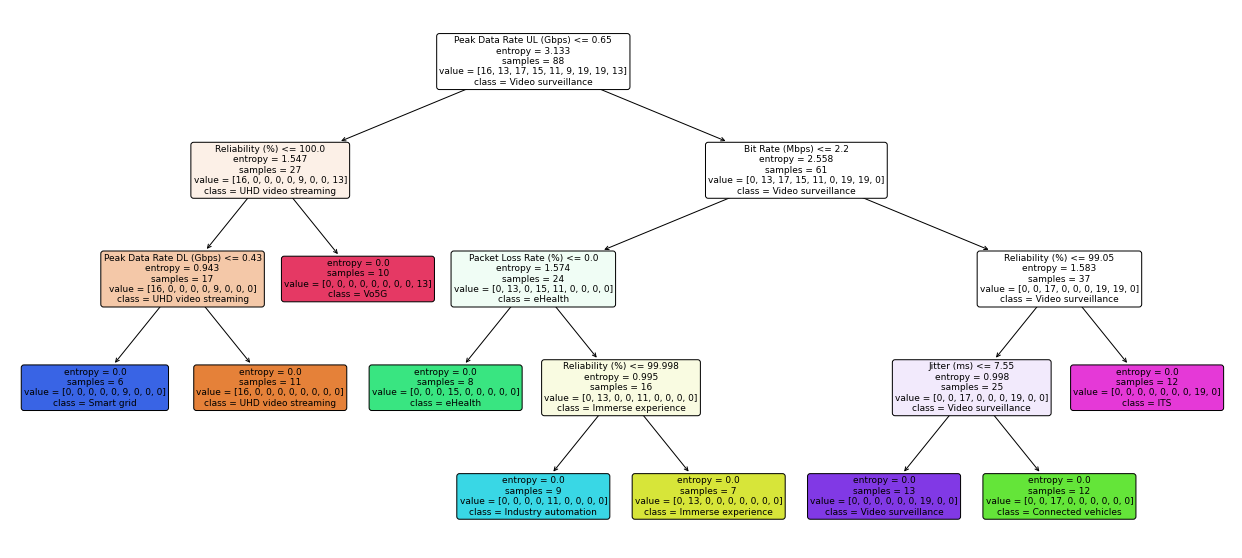

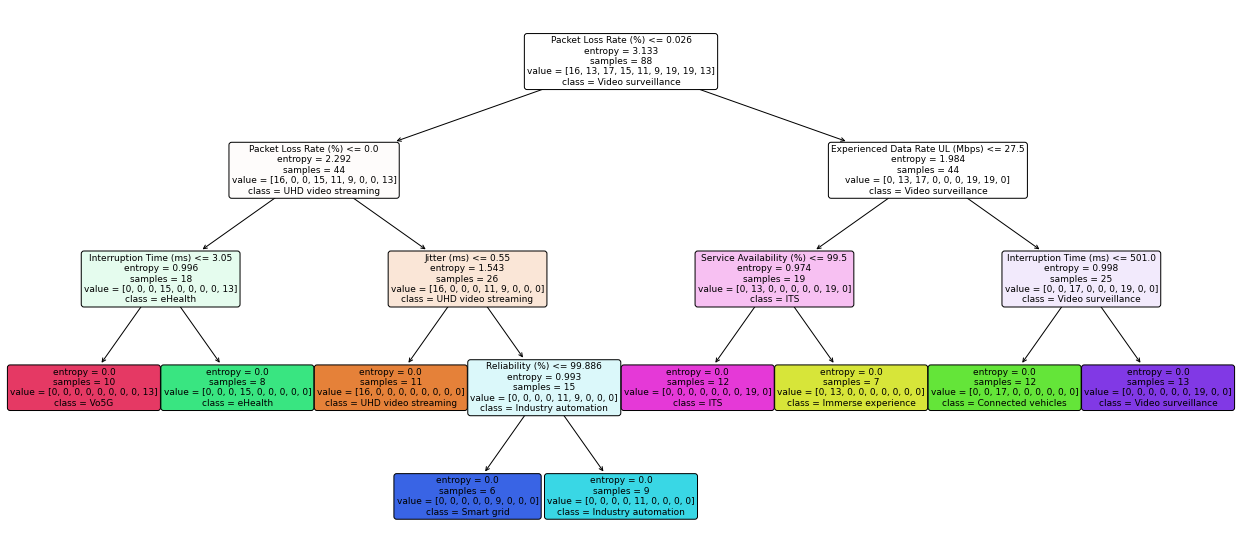

In [83]:
# We show how looks like one of the trees of the Random Forest trained with KPI parameters

# Feature names of the first simulation
feature_names = ['Latency (ms)', 'Jitter (ms)', 'Bit Rate (Mbps)', 'Packet Loss Rate (%)', 
                 'Peak Data Rate DL (Gbps)', 'Peak Data Rate UL (Gbps)', 'Mobility (km/h)',
                 'Reliability (%)']

# Feature names of the second simulation
feature_names2 = ['Latency (ms)', 'Jitter (ms)', 'Bit Rate (Mbps)', 'Packet Loss Rate (%)', 
                 'Peak Data Rate DL (Gbps)', 'Peak Data Rate UL (Gbps)', 'Mobility (km/h)',
                 'Reliability (%)', 'Service Availability (%)', 'Survival Time (ms)', 
                 'Experienced Data Rate DL (Mbps)', 'Experienced Data Rate UL (Mbps)',
                 'Interruption Time (ms)']

# Class names 
class_names = ['UHD video streaming', 'Immerse experience', 'Connected vehicles', 'eHealth',
              'Industry automation', 'Smart grid', 'Video surveillance', 'ITS', 'Vo5G']


plt.figure(figsize=(22,10))        # Figure size
estimator = classifiers[1]        # Remember that the second value of the tuple corresponds to the Random Forest algorithm
estimator.fit(X_train, y_train)   # We train it again with the KPIs training data.
# The forest is trained in the same way since we are indicating the parameter of random_state = 0

# Now we draw the scheme
tree.plot_tree(estimator[2], feature_names = feature_names, fontsize = 9,   
               filled = True, rounded = True, class_names = class_names)

plt.savefig('tree', dpi = 100)   # We save the 1st scheme in .PNG format

plt.figure(figsize=(22,10))     
estimator = classifiers[1]
estimator.fit(X_train2, y_train2)        # We train it again with the KPIs and KQIs training data.
tree.plot_tree(estimator[2], feature_names = feature_names2, fontsize = 9,
               filled = True, rounded = True, class_names = class_names)

plt.savefig('tree2', dpi=100)    # We save the 2nd scheme in .PNG format